# Stock Market📈 Prediction🤔 with Linear Regression

I fetch Stock data from Quandl website using Quandl Library

In [1]:
!pip install Quandl

importing libraires for eda

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import quandl

Now with Quandl API we will fetch TCS stock data of 1 Month for our prediction

In [11]:
quandl.ApiConfig.api_key = ''## enter your key
stock_data = quandl.get('NSE/TCS', start_date='2018-12-01', end_date='2018-12-31')

In [12]:
print(stock_data)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-12-03  1984.00  1990.00  1968.30  1984.00  1982.40             1610576.0   
2018-12-04  1983.00  2019.40  1971.00  2009.85  2010.85             3270615.0   
2018-12-05  2006.00  2018.00  1985.00  2003.90  2006.75             2501539.0   
2018-12-06  1998.00  2017.00  1979.60  1990.00  1992.70             2321216.0   
2018-12-07  1985.05  2003.90  1973.00  1999.85  1995.20             1680420.0   
2018-12-10  1975.00  2011.00  1960.00  1961.00  1975.80             2010786.0   
2018-12-11  1970.00  2010.00  1961.00  1997.05  2000.00             2942014.0   
2018-12-12  2001.10  2022.00  1984.95  2016.50  2016.80             2219993.0   
2018-12-13  2024.00  2029.70  1974.50  1981.95  1982.60             3748429.0   
2018-12-14  1983.00  1998.95  1975.25  1989.00  1989.75             2473761.0   
2018-12-17  1999.00  2004.90

In [14]:
dataset=pd.DataFrame(stock_data)

In [15]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-12-03 to 2018-12-31
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  20 non-null     float64
 1   High                  20 non-null     float64
 2   Low                   20 non-null     float64
 3   Last                  20 non-null     float64
 4   Close                 20 non-null     float64
 5   Total Trade Quantity  20 non-null     float64
 6   Turnover (Lacs)       20 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


In [17]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,20.000000,20.0000,20.000000,20.00000,20.000000,2.000000e+01,20.000000
mean,1967.312500,1983.3975,1945.655000,1962.97750,1962.952500,2.467144e+06,48423.724000
std,36.938946,38.7280,42.023142,42.98135,44.704991,8.906054e+05,17225.204775
min,1905.800000,1909.0000,1870.250000,1892.00000,1889.200000,1.227921e+06,24482.950000
25%,1941.450000,1947.9250,1902.000000,1918.77500,1916.112500,1.875834e+06,35820.857500
50%,1983.000000,2000.4750,1964.650000,1982.97500,1982.500000,2.280173e+06,45388.200000
75%,1993.425000,2012.5000,1975.537500,1993.93750,1994.525000,2.611658e+06,52257.487500
max,2024.000000,2029.7000,1985.000000,2016.50000,2016.800000,4.968201e+06,95411.460000


checking for nullvalues

In [18]:
dataset.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

our dataset having 0 null values

In [19]:
dataset.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [20]:
dataset.skew()

Open                   -0.590339
High                   -0.752103
Low                    -0.865712
Last                   -0.642383
Close                  -0.685695
Total Trade Quantity    1.352325
Turnover (Lacs)         1.261502
dtype: float64

# visulization

Text(0.5, 0, 'open')

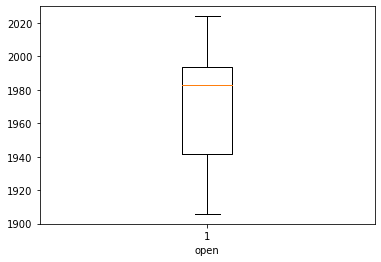

In [38]:
plt.boxplot(data=dataset,x='Open')
plt.xlabel('open')

Text(0, 0.5, 'close')

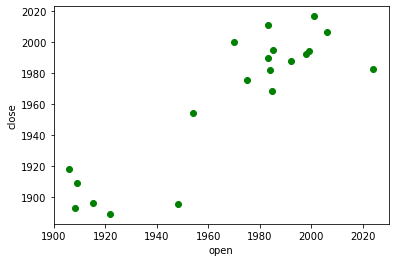

In [40]:
plt.scatter(data=dataset,x='Open',y='Close',c='g')
plt.xlabel('open')
plt.ylabel('close')

<AxesSubplot:>

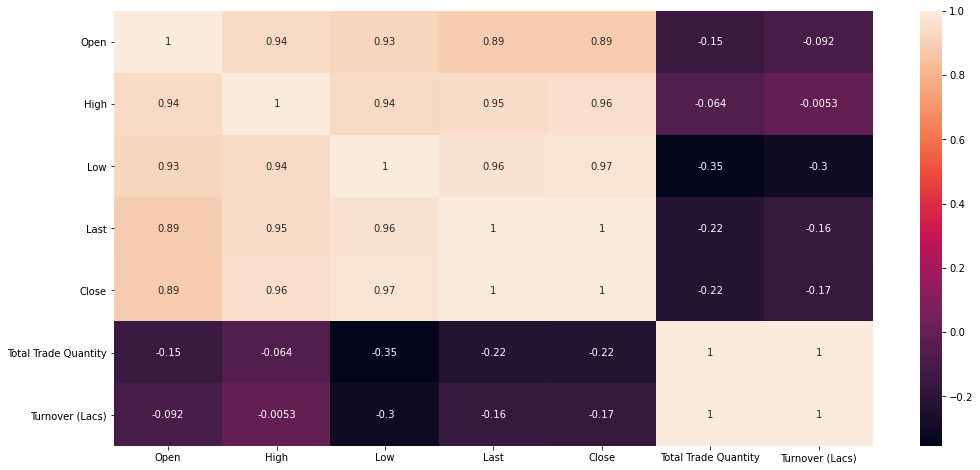

In [49]:
plt.figure(1 , figsize = (17 , 8))
sb.heatmap(dataset.corr(),annot=True)


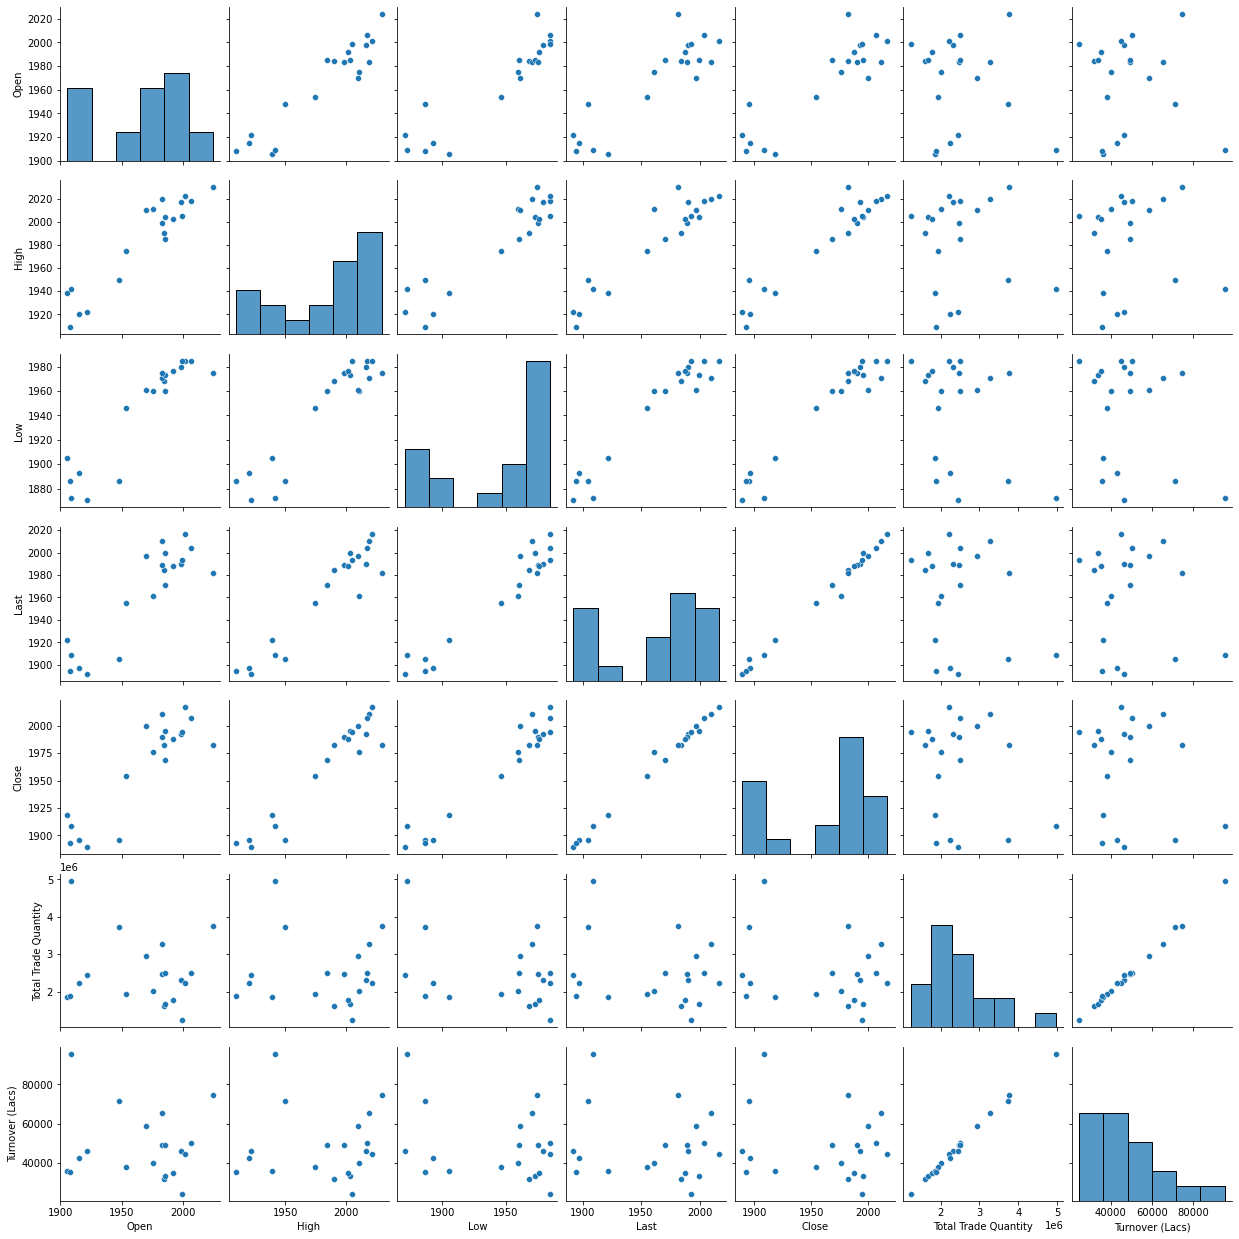

In [50]:
sb.pairplot(data=dataset)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1905.8'),
  Text(1, 0, '1908.0'),
  Text(2, 0, '1909.0'),
  Text(3, 0, '1915.0'),
  Text(4, 0, '1921.8'),
  Text(5, 0, '1948.0'),
  Text(6, 0, '1953.8'),
  Text(7, 0, '1970.0'),
  Text(8, 0, '1975.0'),
  Text(9, 0, '1983.0'),
  Text(10, 0, '1984.0'),
  Text(11, 0, '1984.8'),
  Text(12, 0, '1985.05'),
  Text(13, 0, '1991.9'),
  Text(14, 0, '1998.0'),
  Text(15, 0, '1999.0'),
  Text(16, 0, '2001.1'),
  Text(17, 0, '2006.0'),
  Text(18, 0, '2024.0')])

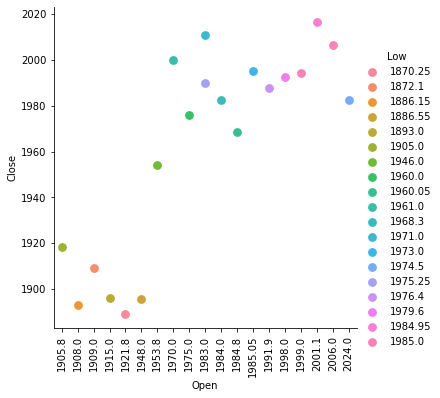

In [54]:
sb.factorplot(x = "Open", y = "Close", hue = "Low",data = dataset)
plt.xticks(rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Turnover (Lacs)'>

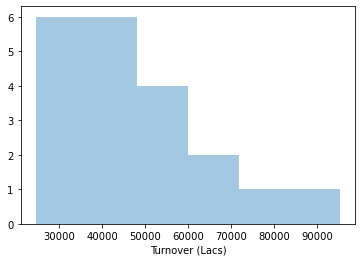

In [55]:
sb.distplot(dataset['Turnover (Lacs)'],kde = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1227921.0'),
  Text(1, 0, '1610576.0'),
  Text(2, 0, '1680420.0'),
  Text(3, 0, '1768742.0'),
  Text(4, 0, '1864116.0'),
  Text(5, 0, '1879740.0'),
  Text(6, 0, '1940277.0'),
  Text(7, 0, '2010786.0'),
  Text(8, 0, '2219993.0'),
  Text(9, 0, '2239130.0'),
  Text(10, 0, '2321216.0'),
  Text(11, 0, '2446614.0'),
  Text(12, 0, '2473761.0'),
  Text(13, 0, '2498833.0'),
  Text(14, 0, '2501539.0'),
  Text(15, 0, '2942014.0'),
  Text(16, 0, '3270615.0'),
  Text(17, 0, '3729956.0'),
  Text(18, 0, '3748429.0'),
  Text(19, 0, '4968201.0')])

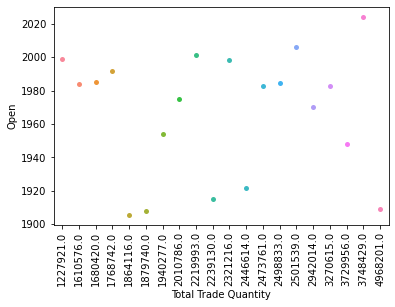

In [57]:
sb.swarmplot(x = "Total Trade Quantity", y = "Open", data = dataset)
plt.xticks(rotation=90)

Now we have to divide data in Dependent and Independent variable

We can see Date column in useul for our prediction but for simplicity we have to remove it because date format is not proper

Now we have to predict open price so this column is out dependent variable because open price depend on High,Low,Close,Last,Turnover etc..

In [60]:
x = dataset.loc[:,'High':'Turnover (Lacs)']
y=dataset.loc[:,'Open']

In [61]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,
2018-12-03,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
2018-12-04,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2018-12-05,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
2018-12-06,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
2018-12-07,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [62]:
y.head()

Date
2018-12-03    1984.00
2018-12-04    1983.00
2018-12-05    2006.00
2018-12-06    1998.00
2018-12-07    1985.05
Name: Open, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [87]:
LR=LinearRegression()

In [88]:
LR.fit(x_train,y_train)

LinearRegression()

In [89]:
LR.score(x_test,y_test)

0.9997647484047201

##I given a test data of random day

In [90]:
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
prediction=LR.predict(Test_data)

In [91]:
print(prediction)

[2001.75159573]


# On that day TCS open on 1998.0 price and our model predicted price is 2001.75 so we can near to the prediction